In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 分析の目的と概要
data5は衣料品スーパーの過去1年の売上をジャンル別に分けたデータである.販売力を構成すいる要因について検討することを目的に分析を行う.

In [3]:
# read data
df = pd.read_csv("data5.csv")
df

,スポーツウェア,紳士ウェア,婦人ウェア,ベビー子供
0,131,175,245,355
1,127,81,189,143
2,272,289,181,195
3,268,237,323,292
4,325,274,293,206
5,209,238,185,82
6,102,185,129,195
7,294,320,642,299
8,292,182,234,205
9,263,310,166,199


## scikit-learnによる主成分分析

In [25]:
# 行列を標準化
dfs = df.iloc[:, :].apply(lambda x: (x-x.mean())/x.std(), axis=0)

from sklearn.decomposition import PCA
pca =PCA() # インスタンス化
pca.fit(dfs)
feature = pca.transform(dfs) 

### 固有値

In [21]:
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,1.971483
PC2,1.498057
PC3,0.340384
PC4,0.190076


### 寄与率
その主成分がデータの個性をどれだけ取り込んでいるかを表す指標

In [34]:
cr = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])
cr

,0
PC1,0.492871
PC2,0.374514
PC3,0.085096
PC4,0.047519


### 累積寄与率

In [35]:
cr.cumsum()

,0
PC1,0.492871
PC2,0.867385
PC3,0.952481
PC4,1.000000


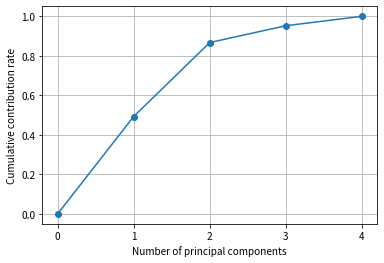

In [51]:
import matplotlib.ticker as ticker
plt.figure(facecolor="white")
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

累積寄与率から,第一主成分と第二主成分で全体の87%を占めていることがわかる.

### 固有ベクトル

In [28]:
pd.DataFrame(pca.components_, columns=dfs.columns[0:], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,スポーツウェア,紳士ウェア,婦人ウェア,ベビー子供
PC1,0.609279,0.593512,0.458732,0.257074
PC2,0.336918,0.360860,-0.526489,-0.692153
PC3,-0.032031,0.283561,-0.694479,0.660504
PC4,0.717105,-0.661148,-0.173415,0.136277


第一主成分はすべてのジャンルで正の値をとっていることがわかる.このことから,第一主成分は総合得点のような指標であることがわかる.第二主成分はスポーツウェアと紳士ウェアで正,婦人ウェアとベビー子供で負の値をとっている.このことから,第二主成分は,スポーツ,紳士ウェアと婦人,ベビー子供ウェアに分けるなんらかの指標になることを示唆している.

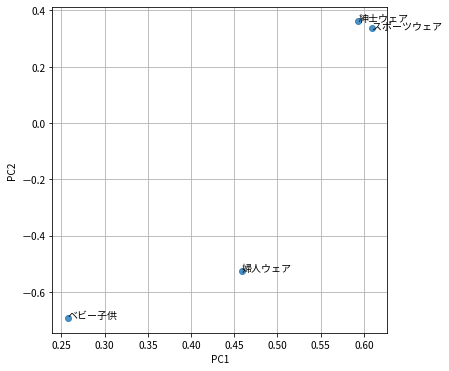

In [32]:
plt.figure(figsize=(6, 6),facecolor="white")
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### 主成分得点
各個体について主成分を計算したもの

In [48]:
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,PC1,PC2,PC3,PC4
0,-0.612625,-1.998873,1.011245,-0.038847
1,-2.167207,-0.436517,-0.756039,0.408318
2,0.449503,0.607504,0.376019,-0.055079
3,0.796785,-0.972450,0.298499,0.328022
4,1.079927,0.235955,-0.142071,0.364781
5,-0.682118,1.090380,-0.709883,-0.324762
6,-1.600581,-0.288346,0.321559,-0.473868
7,2.605129,-1.725420,-0.891434,-0.513350
8,0.000242,-0.070652,-0.176998,0.923969
9,0.508210,0.688313,0.556395,-0.271407


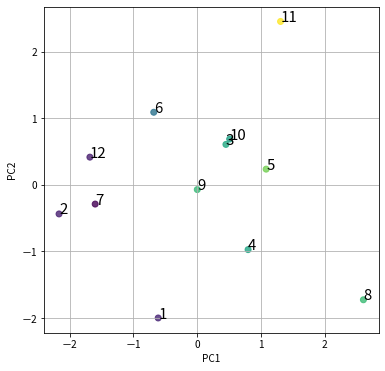

In [49]:
plt.figure(figsize=(6, 6),facecolor="white")
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(dfs.iloc[:, 0]))
for i in range(len(feature)):
    plt.text(feature[i, 0],feature[i, 1],str(i+1),fontsize=15)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

11月に売り上げがでるジャンルの特徴がもっともあることがわかる.総合的な売り上げは8月に特徴があることがわかる.